## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from utilities import *
import math
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
figure_num = 0

# Make a list of calibration images
image_filenames = glob.glob('./calibration/calibration*.jpg')
border = [15, 15, 90, 90]
distort_vals = calculateDistortionVals(image_filenames, border)
src = np.float32(
    [[10, 700],
     [475, 500],
     [830, 500],
     [1270, 700]])+np.float32([border[2], border[0]])

dst = np.float32(
    [[200,690],
     [200,400],
     [1080,400],
     [1080,690]]) + np.float32([border[2], border[0]])

M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
m_s = [M, Minv]

print("Done")

Done


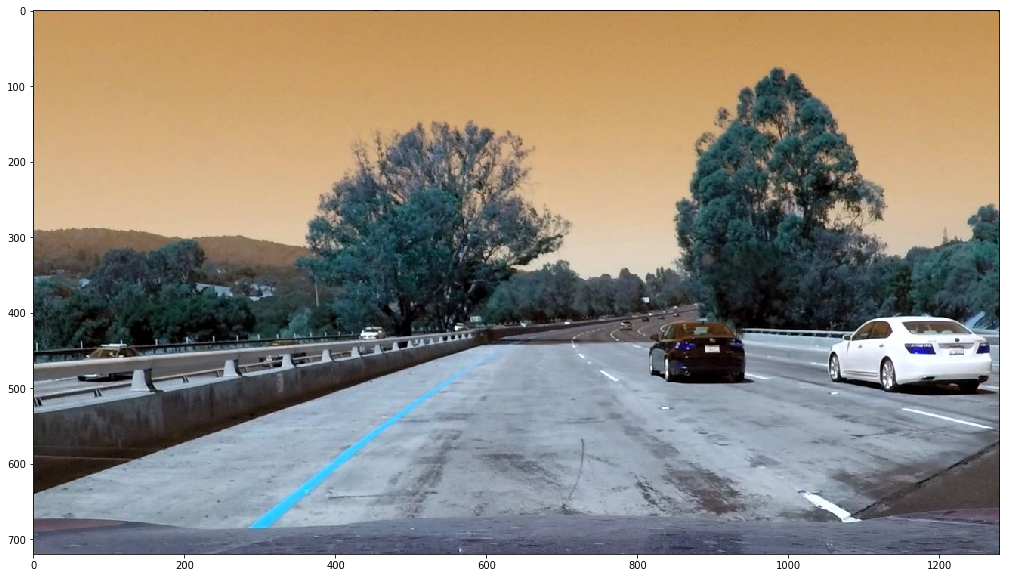

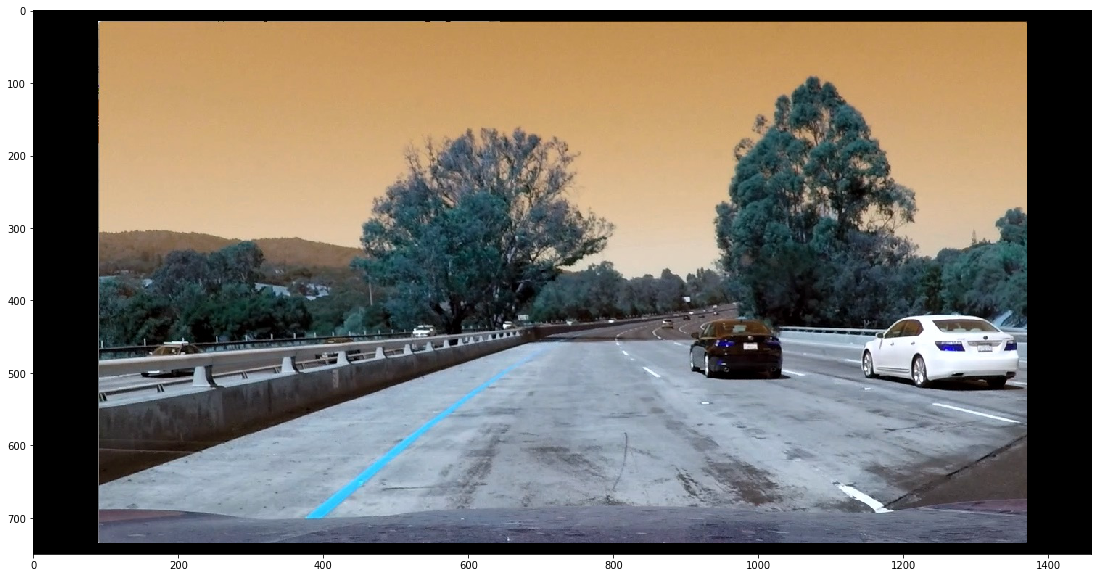

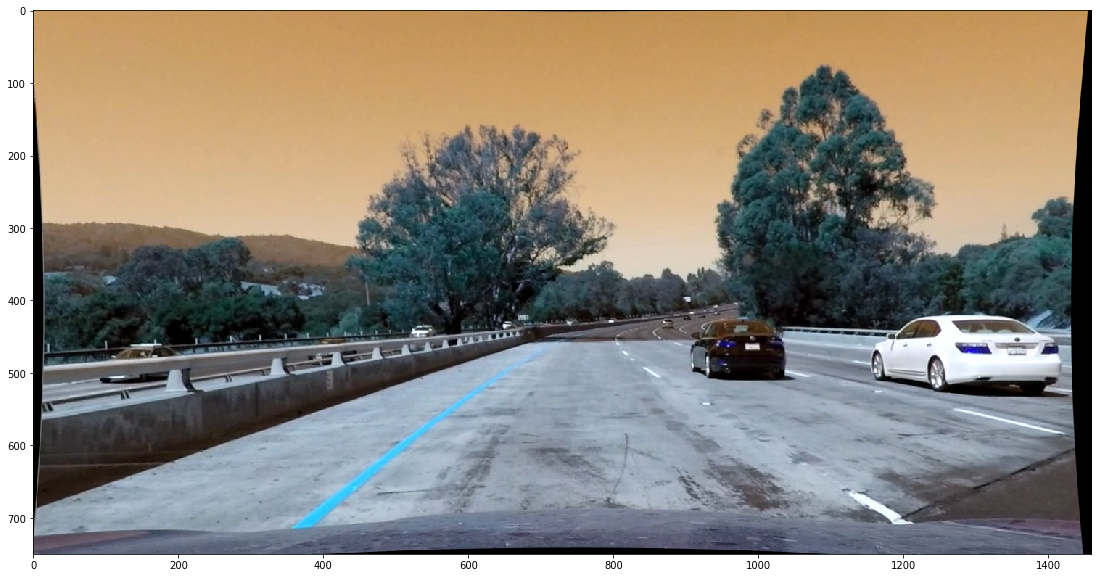

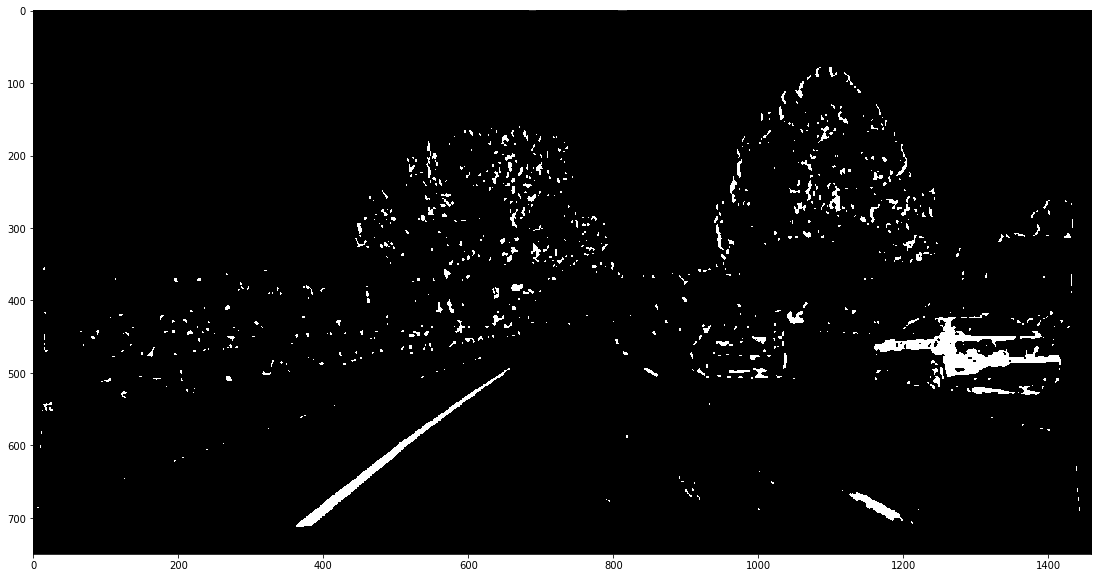

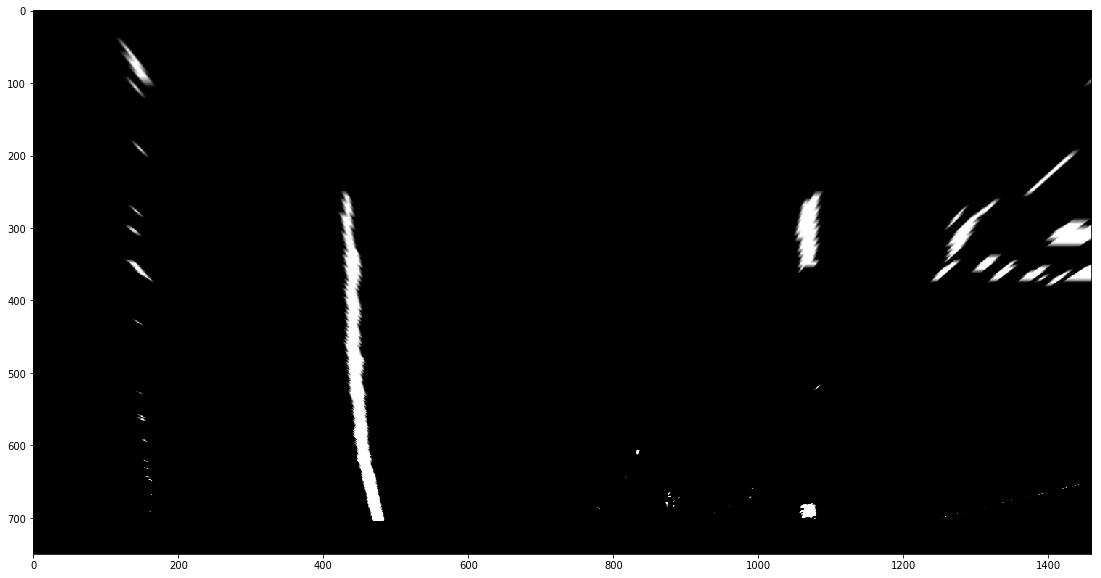

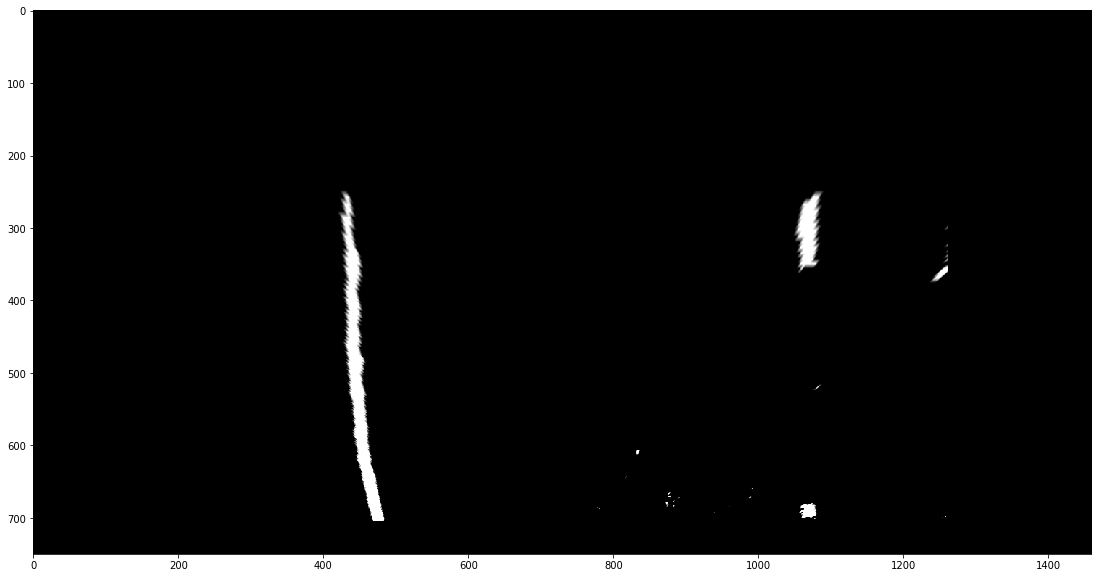

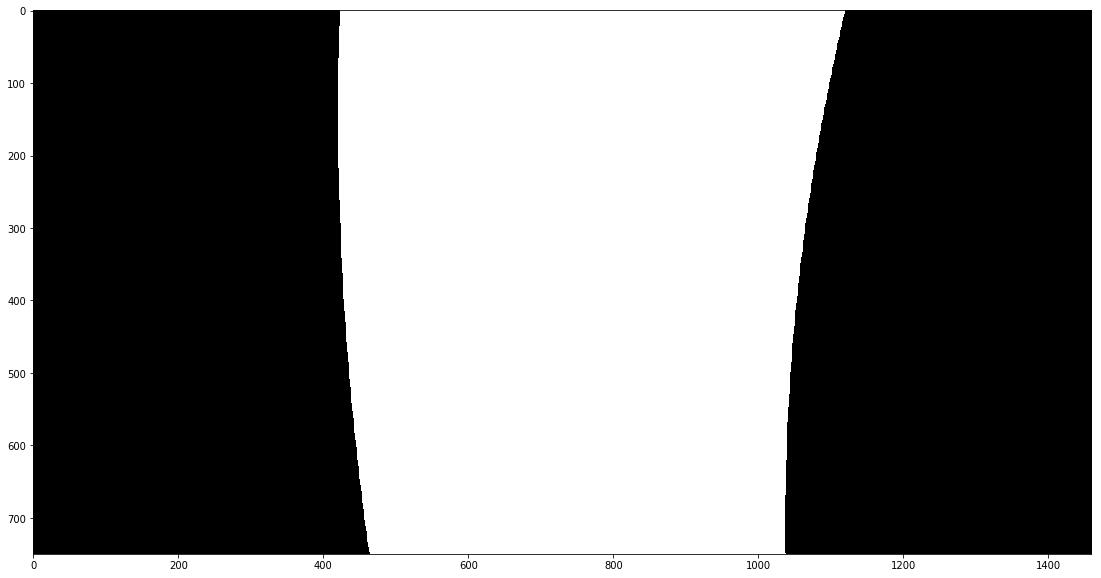

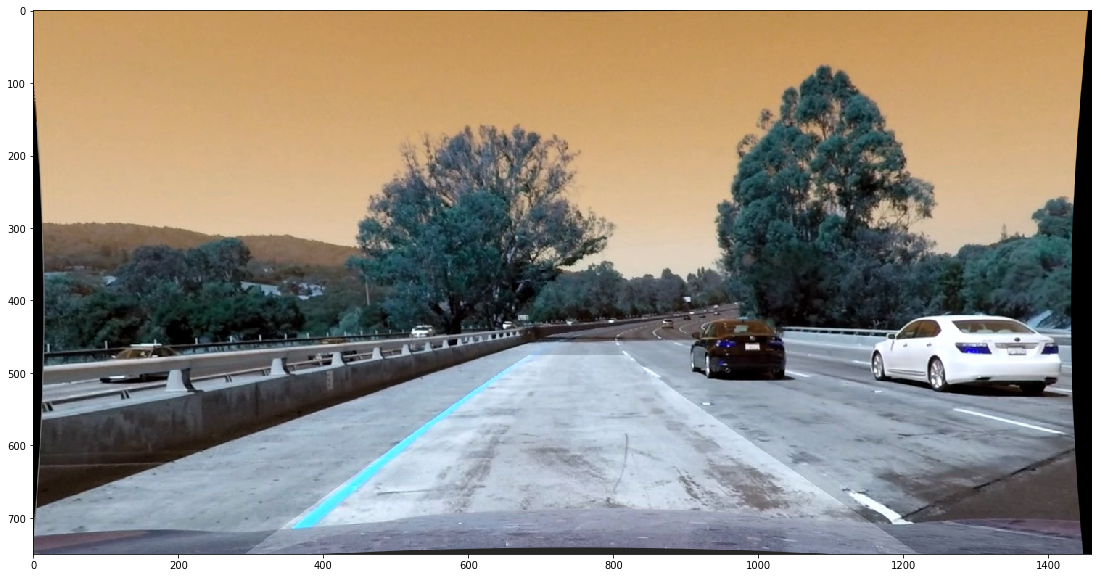

In [2]:
# Returns image with lane overlaid
def fullImagePipeline(img, border, distort_vals, m_s, show_images=False):
    if show_images: 
        showImage(img, 1)
    border_img = cv2.copyMakeBorder(img, top=border[0], bottom=border[1], left=border[2], right=border[3], borderType=cv2.BORDER_CONSTANT) 
    if show_images: 
        showImage(border_img, 2)
    undist_img = undist(border_img, distort_vals['matrix'], distort_vals['dist'])
    if show_images: 
        showImage(undist_img, 3)
    piped_img = to_binary(undist_img)
    if show_images: 
        showImage(piped_img, 4)
    tr_img = transform_perspective(piped_img, distort_vals, m_s[0], show_images=False)
    if show_images: 
        showImage(tr_img, 5)
    im_shape = tr_img.shape
    d = 200 # defines rectangular mask on transformed shape
    mask = np.array([[(d,im_shape[0]),(d, 0), (im_shape[1]-d, 0), (im_shape[1]-d,im_shape[0])]], dtype=np.int32)
    masked_img = region_of_interest(tr_img, mask)
    if show_images: 
        showImage(masked_img, 6)
    num_windows = 10
    window_height = np.int_(im_shape[0]/num_windows)
    #showImage(masked_img)
    l_window_centroids, r_window_centroids = fit_poly_2(masked_img, window_height)
    blank_w_lane = laneOverlay(masked_img, l_window_centroids, r_window_centroids)
    if show_images: 
        showImage(blank_w_lane, 7)
    result = addLaneToOriginal(undist_img, blank_w_lane, m_s[1])
    if show_images: 
        showImage(result, 8)
    return result

img_name='test/test1.jpg'
img, _ = loadImage(img_name)

final_img = fullImagePipeline(img, border, distort_vals, m_s, show_images=True)
#showImage(final_img)

In [5]:
from moviepy.editor import VideoFileClip

def pipelineWrapper(file, filepath=False):
    global border
    global distort_vals
    global m_s
    
    if filepath == True:
        img = cv2.imread(file)
    else:
        img = file
    
    result = fullImagePipeline(img, border, distort_vals, m_s)
    return result

# The float error comes from the moviepy class and I don't feel like fixing it 
output = 'project_output.mp4'
clip1 = VideoFileClip('videos/project_video.mp4')
output_clip = clip1.fl_image(pipelineWrapper)
%time output_clip.write_videofile(output, audio=False)

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


TypeError: 'float' object cannot be interpreted as an integer